# **큐(Queue)란?**

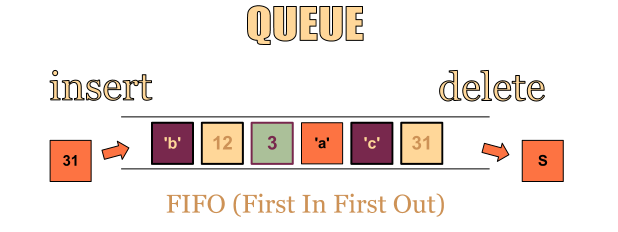

큐는 줄을 서는 행위와 유사하다.

가장 먼저 넣은 데이터를 가장 먼저 꺼낼 수 있는 구조이다.

FIFO(First-In, First-Out) 또는 LILO(Last-In, Last-Out) 방식으로 스택과 꺼내는 순서가 반대이다.

push 명령으로 rear 에 자료를 넣는다. rear += 1 되어 다음에 데이터를 받을 메모리를 가리켜야 한다. pop 명령으로 front 에서 데이터를 빼낸다. front += 1 되어 다음에 데이터를 반환할 메모리를 가리켜야 한다.

queue 는 CPU 연산처리 작업대기, 프린터 인쇄, 프로세스 관리 등 들어온 순서를 보장해야하는 경우 사용된다. 이외에도 BFS 알고리즘 등에 사용된다.

**용어**

Enqueue: 큐에 데이터를 넣는 기능이다.

Dequeue: 큐에서 데이터를 꺼내는 기능이다.

**라이브러리**

다양한 큐 구조로 Queue(), LifoQueue(), PriorityQueue() 를 제공한다.

프로그램에 따라 적합한 자료구조를 사용한다.
Queue(): 가장 일반적인 큐 자료구조이다.

LifoQueue(): 나중에 입력된 데이터가 먼저 출력되는 구조(스택 구조)이다.

PriorityQueue(): 데이터마다 우선순위를 넣어서, 우선순위가 높은 순으로 데이터를 출력한다.


queue 의 rear 가 기리키는 공간에 데이터가 있는데 데이터를 push 하는 경우 overflow, 반대로 front 가 가리키는 공간에 데이터가 없는데 pop 하는 경우를 underflow 라고 한다.

In [ ]:
#list로 구현한 queue
queue_list = list()
#삽입 메소드
def enqueue(data):
  queue_list.append(data)
#추출 메소드
def dequeue():
  data = queue_list[0]
  del queue_list[0]
  return data
#1~15데이터 삽입
for i in range(15):
  enqueue(i)


In [ ]:
len(queue_list), queue_list

(15, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [ ]:
dequeue()

1

**Circular queue**

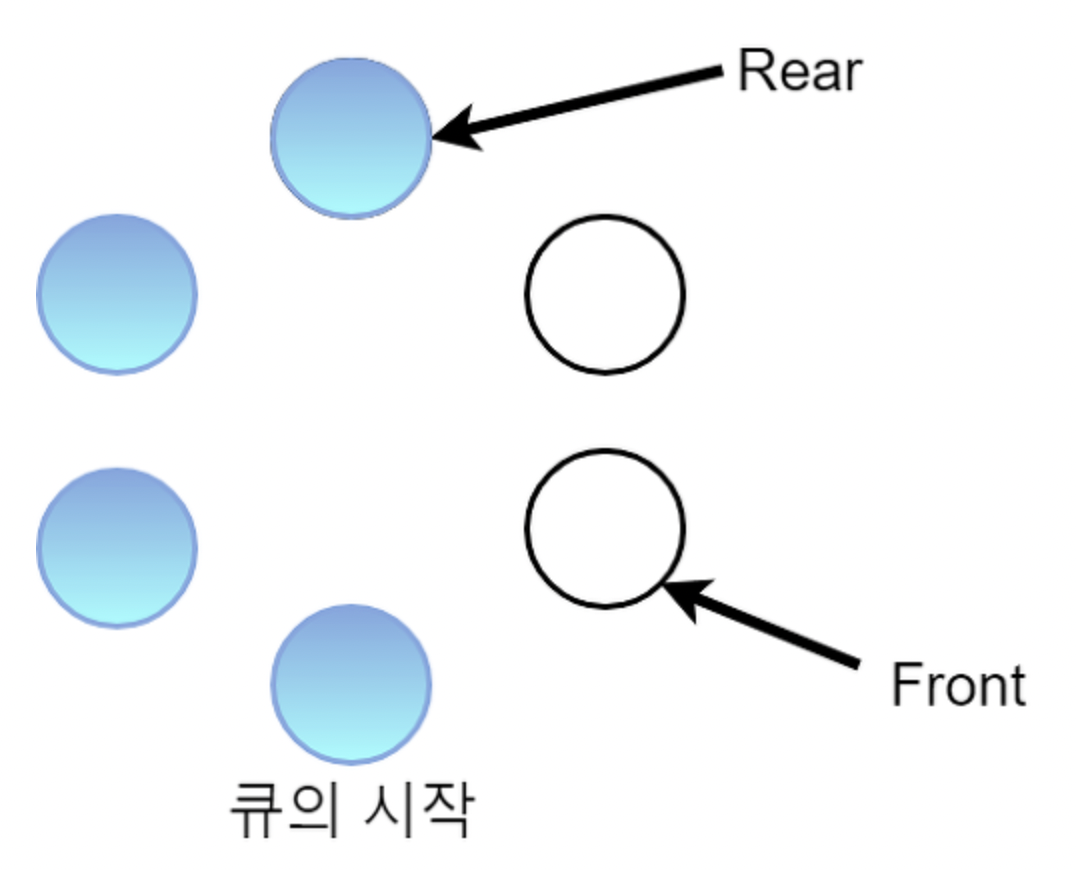

크기가 N 인 queue 에서 모든 원소를 다 채우면 rear 는 N-1 을 가리킨다. 이 때, pop 으로 제일 처음 원소를 제거하면 queue 에 남은 공간 1개가 생긴다.
 하지만 rear 는 마지막을 가리키고 있기 때문에 더이상 원소를 추가할 수 없다.
  이 문제를 해결하기 위해 원형 형태의 circular queue 를 사용한다. queue 와 같이 FIFO 구조의 자료형이다.

동작 방식은 다음과 같다.

처음에는 front 와 rear 가 같은 메모리를 가리킨다.

데이터를 입력하기 위해 rear 는 메모리가 꽉찼는지 검사한다. 꽉찬 경우는 rear 다음 번의 메모리가 front 를 가리키는 경우 (rear + 1 == front) 인데, 꽉차지 않았다면 데이터를 입력하고 rear 는 다음 메모리로 이동한다.

데이터를 반환하기 위해 front 는 메모리가 비었는지 검사한다. 빈 경우에는 현재 front 위치와 rear 위치가 같은 경우 (rear == front) 인데, 비지 않았다면 데이터를 반환하고 front 는 다음 메모리로 이동한다.

In [ ]:
MAX_QSIZE = 10

class CircleQueue: # 원형으로 움직이는 큐
    def __init__(self):
        self.front=0
        self.rear=0
        self.items = [None]*MAX_QSIZE # 큐의 길이

    def isEmpty(self):
        return self.front == self.rear

    def isFull(self):
        return self.front == (self.rear+1) % MAX_QSIZE #

    def clear(self):
        self.front = self.rear

    def enqueue(self,item): # 삽입함수
        if not self.isFull():
            self.rear = (self.rear+1)%MAX_QSIZE # rear 회전
            self.items[self.rear] = item # rear 위치에 삽입

    def dequeue(self): # 삭제
        if not self.isEmpty(): # front 회전
            self.front = (self.front+1) % MAX_QSIZE # front 위치의 항목 반환
            return self.items[self.front]

    def peek(self): # 삭제하지 않고 반환
        if not self.isEmpty():
            return self.items[(self.front+1)%MAX_QSIZE] 

    def size(self):
        return (self.rear - self.front + MAX_QSIZE) % MAX_QSIZE

    def display(self):
        out = []
        if self.front<self.rear:
            out = self.items[self.front+1:self.rear+1]
        else:
            out = self.items[self.front+1:MAX_QSIZE] + self.items[0:self.rear+1]
        print('f={},r={}'.format(self.front,self.rear),out)

In [ ]:
q = CircleQueue()
for i in range(8):
    q.enqueue(i)
q.display()
for i in range(5):
    q.dequeue()
q.display()
for i in range(8,14):
    q.enqueue(i)
q.display()

f=0,r=8 [0, 1, 2, 3, 4, 5, 6, 7]
f=5,r=8 [5, 6, 7]
f=5,r=4 [5, 6, 7, 8, 9, 10, 11, 12, 13]
